<a href="https://www.kaggle.com/code/jibonk/philadelphia-crash-data-basic-eda?scriptVersionId=242860166" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Philadelphia Fatal Crashes Analysis

## Initial Setup and Data Loading

This section handles the essential setup for our analysis:

1. **Library Imports**: 
   - `matplotlib.pyplot` and `seaborn` for visualizations
   - `numpy` for numerical operations
   - `pandas` for data manipulation
   - `warnings` and `os` for system operations

2. **Data Discovery**:
   - Scans the Kaggle input directory to locate and display available dataset files
   - Specifically looks for the Philadelphia fatal crashes dataset

3. **Warning Management**:
   - Suppresses warning messages to keep the notebook output clean

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
warnings.filterwarnings('ignore')

/kaggle/input/philadelphia-fatal-crashes/philadelphia_fatal_crashes_clean.csv


## Data Loading & Preparation

Loads the Philadelphia fatal crashes dataset with optimized data types:
- Uses specific dtypes (`category` for strings, `int32`/`Float64` for numbers)
- Properly formats dates (`datetime64`)

`df.info()` displays:
- Column names and optimized dtypes
- Non-null counts (missing data)

In [2]:
df = pd.read_csv("/kaggle/input/philadelphia-fatal-crashes/philadelphia_fatal_crashes_clean.csv", index_col=False)
data_types = {
    'crash_id': 'Int64',
    'year': 'int32',
    'police_district': 'category',
    'crash_date': 'datetime64[ns]',
    'day_name': 'category',
    'primary_street': 'string',
    'age': 'Float64',
    'victim_gender': 'category',
    'collision_type': 'string',
    'hit_and_run': 'bool',
    'primary_vehicle': 'category',
    'secondary_vehicle': 'category',
    'arrest_made': 'category',
    'investigation_status': 'string',
    'time': 'object',
    'latitude': 'float64',
    'longitude': 'float64',
    'age_group': 'category'
}
df = df.astype(data_types)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            797 non-null    int64         
 1   crash_id              797 non-null    Int64         
 2   year                  797 non-null    int32         
 3   police_district       797 non-null    category      
 4   crash_date            797 non-null    datetime64[ns]
 5   day_name              797 non-null    category      
 6   primary_street        797 non-null    string        
 7   age                   792 non-null    Float64       
 8   victim_gender         796 non-null    category      
 9   collision_type        797 non-null    string        
 10  hit_and_run           797 non-null    bool          
 11  primary_vehicle       797 non-null    category      
 12  secondary_vehicle     787 non-null    category      
 13  arrest_made         

## Plot Styling

Applies ggplot2-style aesthetics to all visualizations:
- Clean gray background 
- White gridlines
- Improved color palette

In [3]:
plt.style.use("ggplot")

## Custom Visualization Function

Defines a reusable function `plot_value_counts()` that:

**Key Features:**
- Creates standardized bar plots for value counts
- Automatically handles:
  - Default titles/labels
  - Value sorting (descending by default)
  - Long label rotation
  - Bar value annotations

**Customization Options:**
- Adjustable figure size and color
- Optional title/axis labels
- Sort order control
- Automatic smart formatting

**Technical Benefits:**
- Reduces code duplication
- Ensures visual consistency
- Handles edge cases automatically
- Follows DRY (Don't Repeat Yourself) principle

**Usage Example:**
```python
plot_value_counts(df, "column_name", 
                 title="Custom Title",
                 color="salmon")

In [4]:
def plot_value_counts(
    df,
    count_column,
    title=None,
    xlabel=None,
    ylabel=None,
    color="steelblue",
    figsize=(10, 6),
    sort_descending=True,  # New parameter to control sorting
):
    """
    Creates a bar plot showing value counts for a specified column, sorted in descending order by default.

    Parameters:
    - df: DataFrame containing the data
    - count_column: Column name to count values from
    - title: Plot title (defaults to 'Count by {column_name}')
    - xlabel: X-axis label (defaults to column_name)
    - ylabel: Y-axis label (defaults to 'Count')
    - color: Bar color (defaults to 'steelblue')
    - figsize: Figure size (defaults to (10, 6))
    - sort_descending: Whether to sort bars in descending order (default: True)
    """
    # Get value counts and sort if requested
    value_counts = df[count_column].value_counts().rename("count").reset_index()
    value_counts.columns = [count_column, "count"]

    if sort_descending:
        value_counts = value_counts.sort_values("count", ascending=False)

    # Set default labels if none provided
    if title is None:
        title = f"Count by {count_column}"
    if xlabel is None:
        xlabel = count_column.replace("_", " ").title()
    if ylabel is None:
        ylabel = "Count"

    # plot
    plt.figure(figsize=figsize)
    bar_plot = sns.barplot(
        data=value_counts,
        x=count_column,
        y="count",
        color=color,
        order=value_counts[count_column] if sort_descending else None,  # Enforce order
    )

    # Formatting
    plt.title(title, fontsize=14, pad=20)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Rotate x-labels if long
    if any(len(str(x)) > 5 for x in value_counts[count_column]):
        plt.xticks(rotation=45, ha="right")

    # Add count labels on bars
    for p in bar_plot.patches:
        bar_plot.annotate(
            format(p.get_height(), ".0f"),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
            fontsize=10,
        )

    plt.tight_layout()
    plt.show()

## Yearly Accident Analysis

Visualizes fatal crash frequency by year using our custom plotting function.

**Key Insights:**  

This graph shows fatal crashes in Philadelphia from 2019 to now. Crashes were lowest in 2019, then jumped sharply in 2020 to become the deadliest year. While numbers have changed since 2020, they remain higher than 2019. The 2020 surge stands out clearly in the data.

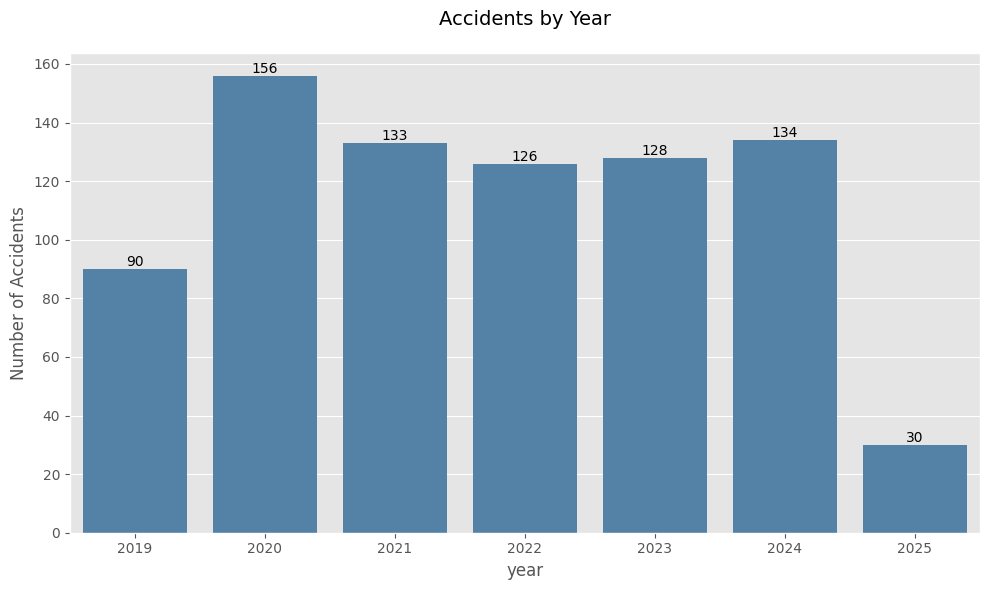

In [5]:
plot_value_counts(
    df,
    "year",
    "Accidents by Year",
    "year",
    "Number of Accidents",
    sort_descending=False,
)

## Police District Accident Analysis  

This bar chart ranks Philadelphia police districts by fatal crash frequency. **District 25** leads with 85 crashes, closely followed by District 15 (84). The top 5 districts account for over 40% of all crashes. While most districts range between 30-70 incidents, **District 77** stands out with just 1 crash. The visualization clearly identifies high-priority zones needing traffic safety interventions.  

**Key Takeaways:**  
- **Crash Hotspots:** Districts 25, 15, 24 (70+ crashes)  
- **Moderate Risk:** 30-60 crashes in 10 districts  
- **Safer Areas:** 6 districts with ≤20 crashes  

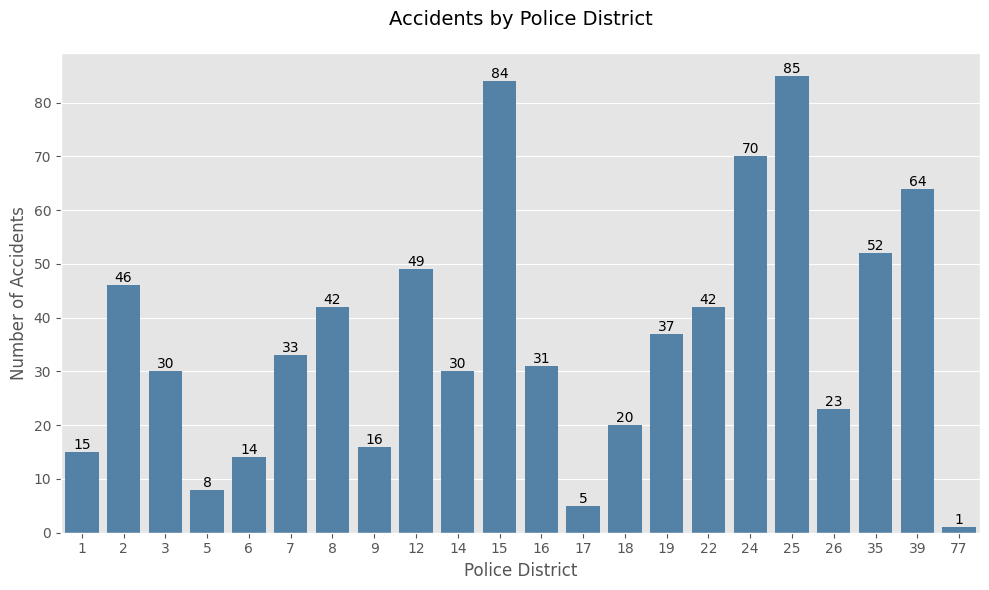

In [6]:
plot_value_counts(
    df,
    "police_district",
    "Accidents by Police District",
    "Police District",
    "Number of Accidents",
    sort_descending=False,
)

## Weekly Accident Patterns  

This chart reveals fatal crashes by day of week, showing **weekends are most dangerous**:  

**Key Findings:**  
- **Saturday** peaks at **143 crashes** (17% higher than weekly average)  
- **Sunday** follows closely with **133**  
- Weekdays average **104 crashes**, with **Thursday safest** (90)  

*Data shows clear 59% surge from safest (Thu) to most dangerous (Sat) day.*  

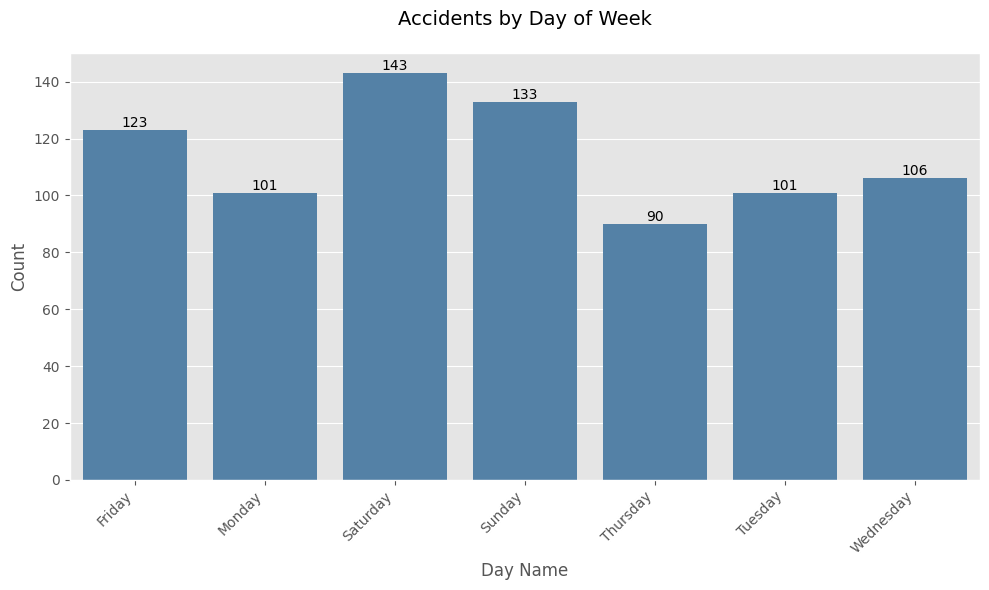

In [7]:
plot_value_counts(
    df, "day_name", title="Accidents by Day of Week", sort_descending=False
)

## Primary Vehicle Involvement in Fatal Crashes

This chart reveals which vehicle types are most frequently involved as the primary vehicle in fatal collisions:

**Critical Findings:**
- **Autos dominate** with 627 crashes (75% of total)
- **Motorcycles** rank second at 121 (14.5%), despite lower ridership
- **Commercial vehicles** (13) and **trains** (10) show notable risk
- Rare but tragic cases involving **pedestrians** and **bicycles** (1 each)

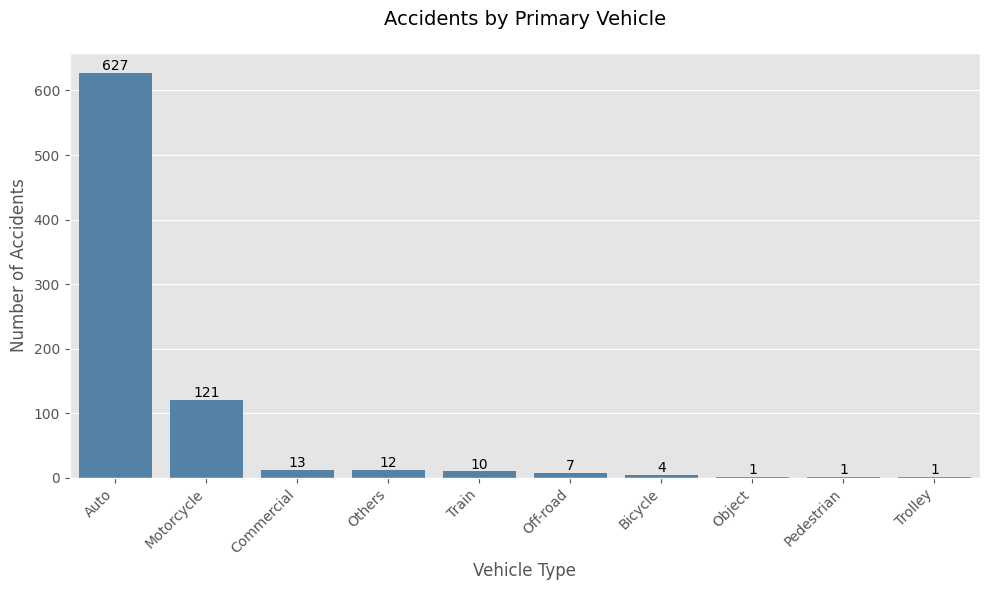

In [8]:
plot_value_counts(
    df,
    "primary_vehicle",
    "Accidents by Primary Vehicle",
    "Vehicle Type",
    "Number of Accidents",
)

## Secondary Vehicle Involvement in Fatal Crashes  

This chart shows what objects/vehicles were struck in fatal collisions:  

**Key Insights:**  
- **Pedestrians** (319) are hit **4× more** than parked vehicles  
- **Fixed objects** (140) cause more deaths than all motorcycles+bicycles combined  
- **Bicycles** (28) and **motorcycles** (26) face similar secondary-impact risks  

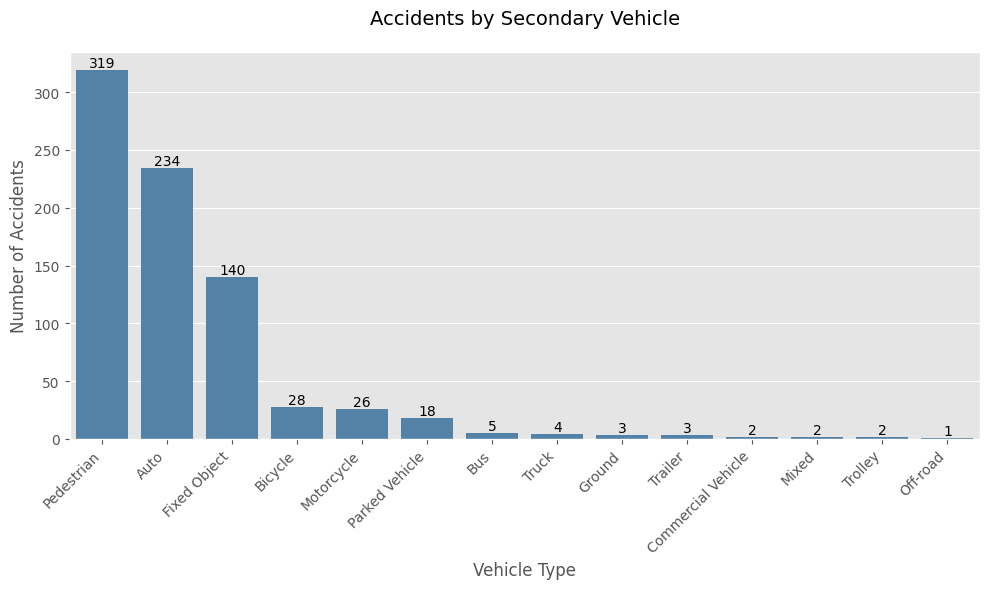

In [9]:
plot_value_counts(
    df,
    "secondary_vehicle",
    title="Accidents by Secondary Vehicle",
    xlabel="Vehicle Type",
    ylabel="Number of Accidents",
)

## Age and Gender Analysis of Crash Victims  

This data reveals striking patterns in fatal crash victims by age group and gender:  

**Alarming Trends:**  
- **Young adults 26-35** suffer most fatalities (178 total)  
- **Men dominate every age group**, outnumbering women **3:1** overall  
- **Peak risk** for men occurs earlier (26-35 years) than women (56-65 years)  

**Critical Insights:**  
1. **Gender gap** is most extreme in 26-35 group (132M vs 46F)  
2. **Senior women** (75+) face higher risk than teen girls (0-18)  
3. **Two risk peaks** emerge: young adults (26-35) and seniors (56-75) 

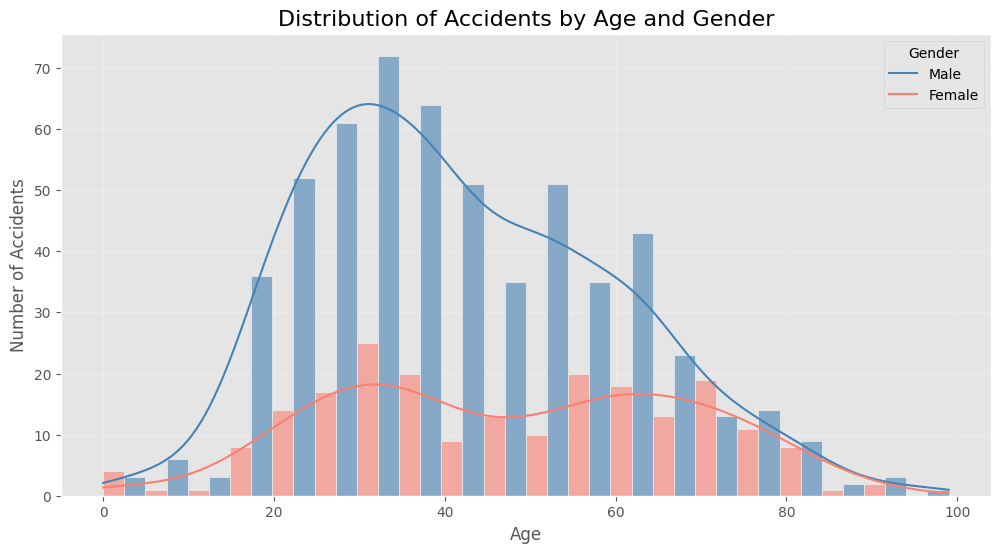

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x="age",
    hue="victim_gender",
    bins=20,
    kde=True,
    palette={"M": "steelblue", "F": "salmon"},
    alpha=0.6,
    multiple="dodge",
)

plt.title("Distribution of Accidents by Age and Gender", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.legend(title="Gender", labels=["Male", "Female"])
plt.grid(True, alpha=0.3)
plt.show()

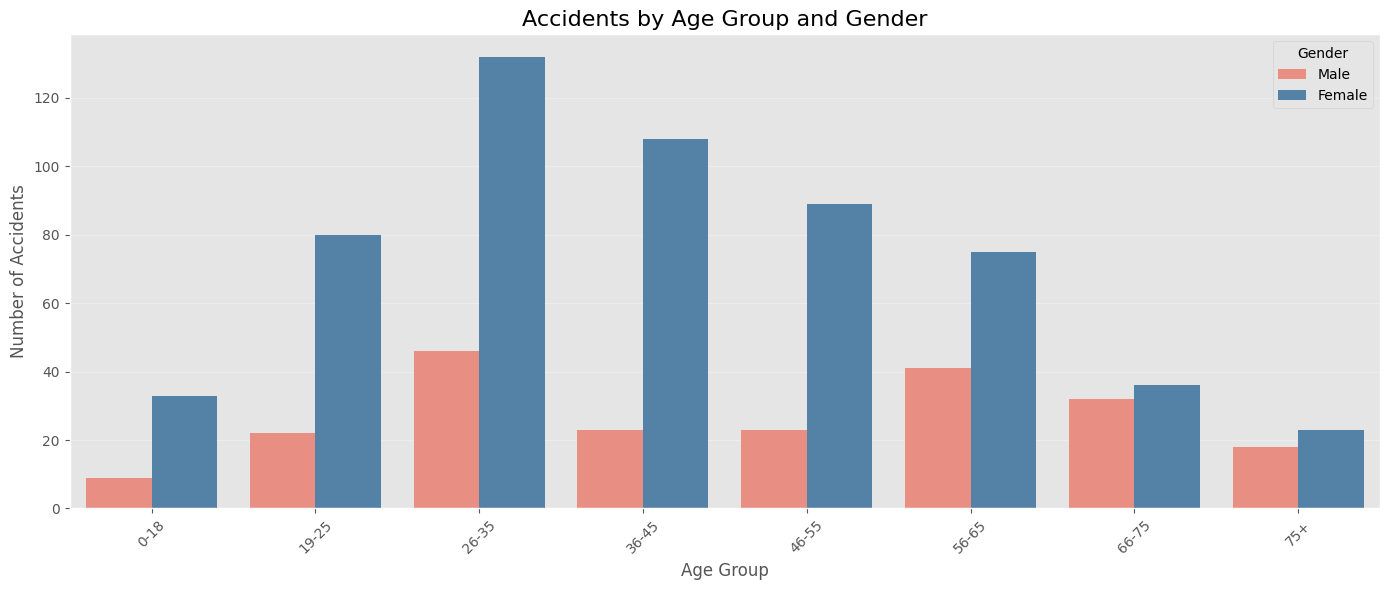

In [11]:
age_groups = ["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "66-75", "75+"]
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df,
    x="age_group",
    hue="victim_gender",
    palette={"M": "steelblue", "F": "salmon"},
    order=age_groups,  # Use predefined order instead of value counts
)

plt.title("Accidents by Age Group and Gender", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.legend(title="Gender", labels=["Male", "Female"])
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis="y")
plt.tight_layout()
plt.show()